This notebook is based on code written by Mike from https://github.com/foxtrotmike/PCA-Tutorial/blob/c26fa6270bfe0752bd1a7fe0ca876893c33e0088/pca.ipynb

In [ ]:
import numpy as np

In this notebook, we look at how PCA works under the hood by going through a comprehensive example. We start with a dataset consisting of height, weight, and shoe size of 13 individuals. 

In [14]:
heights = np.array([55, 72, 61, 53, 57, 64, 75, 72, 71, 67, 74, 68, 82]) #in inches
weights = np.array([71,92, 73, 68, 77, 84, 92, 87, 86, 81, 95, 87, 102]) #in kg
shoe_size = np.array([7, 7, 8, 7, 6, 7, 6, 5, 7, 4, 6, 10, 5]) # in UK

A 3D plot of this data:

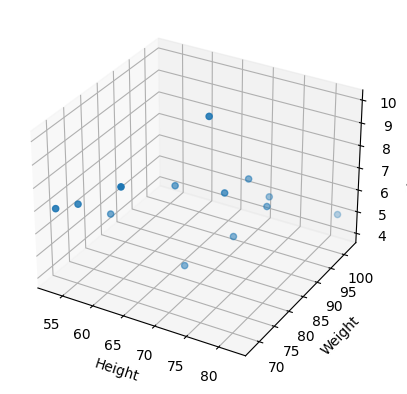

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(heights, weights, shoe_size)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Shoe Size')
ax.grid()
plt.show()

Now let's apply PCA

# Standardisation

Before we standardise the data, let's see what happens when the data is not standardised.

In [16]:
X = np.vstack((heights, weights, shoe_size)).T # create data matrix
N, d = X.shape
print("The dimensions of X are:", X.shape)

Xm = np.mean(X, axis=0)
Xs = np.std(X, axis=0)
Xv = np.var(X, axis=0)
print("The mean is:", Xm)
print("The standard deviation is:", Xs)
print("The variance is:", Xv)

Cx = np.cov(X.T, bias=True)
print("The co-variance matrix is:\n", Cx)

The dimensions of X are: (13, 3)
The mean is: [67.         84.23076923  6.53846154]
The standard deviation is: [8.27414881 9.60091219 1.44729906]
The variance is: [68.46153846 92.17751479  2.09467456]
The co-variance matrix is:
 [[68.46153846 76.38461538 -3.69230769]
 [76.38461538 92.17751479 -3.50887574]
 [-3.69230769 -3.50887574  2.09467456]]


Now let's standardise the data.

In [17]:
Xn = (X-Xm)/Xs
print("Mean after standardisation:", np.mean(Xn, axis=0))
print("Standard deviation after standardisation:", np.std(Xn, axis=0))
print("Variance after standardisation:", np.var(Xn, axis=0))
print("Total Variance after standardisation:", np.sum(np.var(Xn, axis=0)))

Mean after standardisation: [1.70803542e-17 4.95330273e-16 8.54017711e-17]
Standard deviation after standardisation: [1. 1. 1.]
Variance after standardisation: [1. 1. 1.]
Total Variance after standardisation: 2.9999999999999996


A plot of the standardised data:

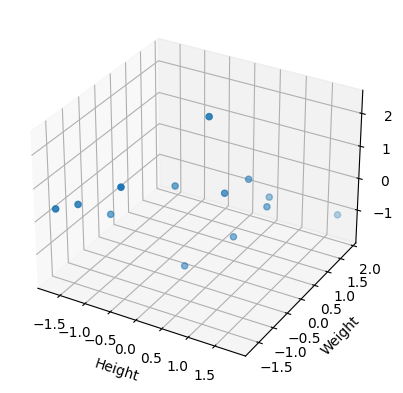

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xn[:,0], Xn[:,1], Xn[:,2])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Shoe Size')
ax.grid()
plt.show()

# Covariance matrix

In [19]:
C = np.cov(Xn.T, bias=True) # Determine dxd sized Cov. Matrix with normalization by N (Number of samples)

print("Covariance matrix Dimensionality is:", C.shape)
print("Covariance matrix is:\n", C)

Covariance matrix Dimensionality is: (3, 3)
Covariance matrix is:
 [[ 1.          0.96154601 -0.30833035]
 [ 0.96154601  1.         -0.25252083]
 [-0.30833035 -0.25252083  1.        ]]


Covariance is high for height and weight which implies PCA should work well here. For shoe size and the other features, covariance is small which means PCA will not work well here. As the data is standardised, the covariance ranges from -1 to 1. 

# Eigenvectors and eigenvalues of the covariance matrix

In [20]:
ev, pc = np.linalg.eig(C) # Eigenvectors, principle components
ev = np.abs(ev)

cvar = np.var(np.dot(Xn, pc), axis=0)
idx = np.argsort(-cvar)
cvar = cvar[idx]
pc = pc[:, idx]

print("The eigenvectors (principal components) are the columns of:\n", pc)
print("The variance captured along each PC:", cvar)
print("The fraction of variance captured along each PC:", np.cumsum(cvar)/np.sum(cvar))
ev = ev[idx]
print("The eigenvalues are:", ev)
print("The fraction of eigenvalues along each PC:", np.cumsum(ev)/np.sum(ev))

The eigenvectors (principal components) are the columns of:
 [[-0.66998245  0.20717123 -0.712884  ]
 [-0.66084375  0.27108797  0.69985487]
 [ 0.33824407  0.93999542 -0.04471637]]
The variance captured along each PC: [2.10409249 0.85922002 0.03668749]
The fraction of variance captured along each PC: [0.70136416 0.98777084 1.        ]
The eigenvalues are: [2.10409249 0.85922002 0.03668749]
The fraction of eigenvalues along each PC: [0.70136416 0.98777084 1.        ]


# Plotting the standardised data with the principle components

## Plotting the unit normal principle components

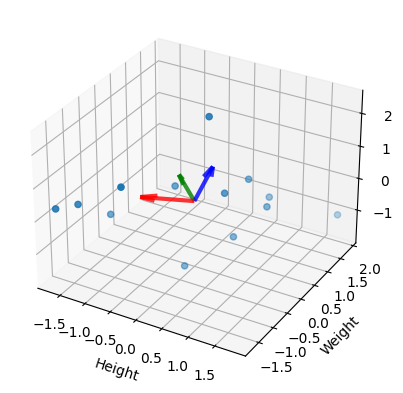

In [21]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xn[:,0], Xn[:,1], Xn[:,2])

ax.quiver(
        0, 0, 0, # <-- starting point of vector
        pc[0, 0], pc[1, 0], pc[2, 0], # <-- directions of vector
        color = 'red', alpha = .8, lw = 3)

ax.quiver(
        0, 0, 0, # <-- starting point of vector
        pc[0, 1], pc[1, 1], pc[2, 1], # <-- directions of vector
        color = 'blue', alpha = .8, lw = 3)

ax.quiver(
        0, 0, 0, # <-- starting point of vector
        pc[0, 2], pc[1, 2], pc[2, 2], # <-- directions of vector
        color = 'green', alpha = .8, lw = 3)

    
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Shoe Size')
ax.grid()
plt.show()

## Plotting the princple components with eigenvalue magnitude

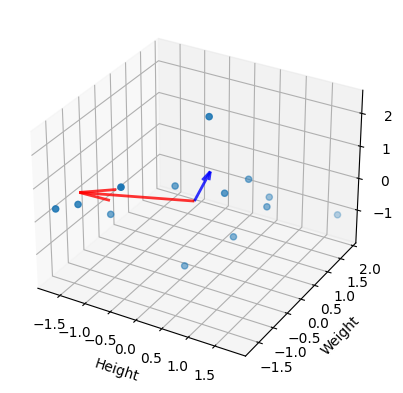

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xn[:,0], Xn[:,1], Xn[:,2])

ax.quiver(0, 0, 0, # starting point of vector
        pc[0, 0]*ev[0], pc[1, 0]*ev[0], pc[2, 0]*ev[0], # direction of vector
        color = 'red', alpha = .8, lw = 2)

ax.quiver(0, 0, 0, # starting point of vector
        pc[0, 1]*ev[1], pc[1, 1]*ev[1], pc[2, 1]*ev[1], # direction of vector
        color = 'blue', alpha = .8, lw = 2)

ax.quiver(0, 0, 0, # starting point of vector
        pc[0, 2]*ev[2], pc[1, 2]*ev[2], pc[2, 2]*ev[2], # direction of vector
        color = 'green', alpha = .8, lw = 2)

    
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Shoe Size')

ax.grid()
plt.show()


# Plotting principle components over original data

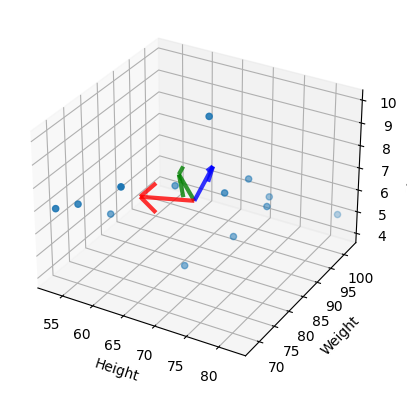

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])

ax.quiver(np.mean(X[:,0]), np.mean(X[:,1]), np.mean(X[:,2]), # <-- starting point of vector
        pc[0, 0] * np.std(X[:,0]), pc[1, 0] * np.std(X[:,1]), pc[2, 0] * np.std(X[:,2]), # <-- directions of vector
        color = 'red', alpha = .8, lw = 3)

ax.quiver(np.mean(X[:,0]), np.mean(X[:,1]), np.mean(X[:,2]), # <-- starting point of vector
        pc[0, 1] * np.std(X[:,0]), pc[1, 1] * np.std(X[:,1]), pc[2, 1] * np.std(X[:,2]), # <-- directions of vector
        color = 'blue', alpha = .8, lw = 3)

ax.quiver(np.mean(X[:,0]), np.mean(X[:,1]), np.mean(X[:,2]), # <-- starting point of vector
        pc[0, 2] * np.std(X[:,0]), pc[1, 2] * np.std(X[:,1]), pc[2, 2] * np.std(X[:,2]), # <-- directions of vector
        color = 'green', alpha = .8, lw = 3)

    
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Shoe Size')
ax.grid()
plt.show()

Here the vectors are normalised to the standard deviation of the data, they are not normalised and are not scaled by their eigenvalues.

# Plotting the data transfromed by PCA

## Taking the first principal component

Here we take the transform along the first principal component and then transform it back into the orignal standardised coordinate system. First we take the transform with only the first principal component

In [24]:
Z = np.dot(Xn, pc[:,:1])

Now project it back

In [25]:
Z_inverse = np.dot(np.dot(Xn, pc[:,:1]), pc[:,:1].T)

Now plot

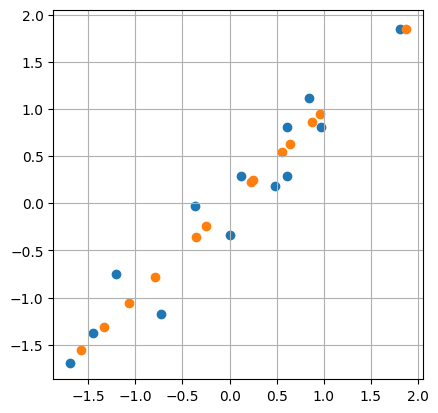

In [26]:
plt.scatter(Xn[:, 0], Xn[:, 1])
plt.scatter(Z_inverse[:, 0], Z_inverse[:, 1])
plt.axis('square')
plt.grid()
plt.show()

## Taking the first and second principal component

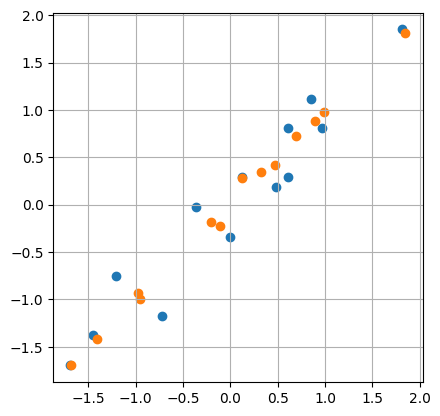

In [27]:
Z = np.dot(Xn, pc[:,:2])
Z_inverse = np.dot(Z, pc[:,:2].T)
plt.scatter(Xn[:, 0], Xn[:, 1])
plt.scatter(Z_inverse[:, 0], Z_inverse[:, 1])
plt.axis('square')
plt.grid()
plt.show()

## All three principle components

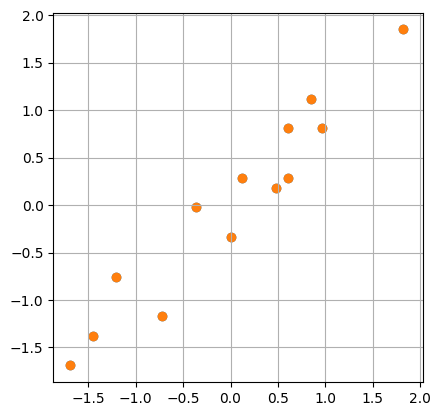

In [28]:
Z = np.dot(Xn, pc[:,:3])
Z_inverse = np.dot(Z, pc[:,:3].T)
plt.scatter(Xn[:, 0], Xn[:, 1])
plt.scatter(Z_inverse[:, 0], Z_inverse[:, 1])
plt.axis('square')
plt.grid()
plt.show()

As expected, the data lines up perfectly

## Along another axis

This time we plot height against show size normalised

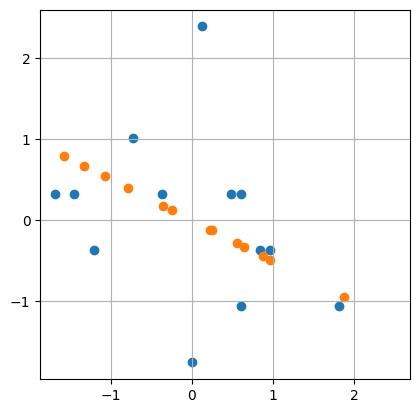

In [29]:
Z = np.dot(Xn, pc[:,:1])
Z_inverse = np.dot(Z, pc[:,:1].T)
plt.scatter(Xn[:, 0], Xn[:, 2])
plt.scatter(Z_inverse[:, 0], Z_inverse[:, 2])
plt.axis('square')
plt.grid()
plt.show()

# Plotting the scree plot

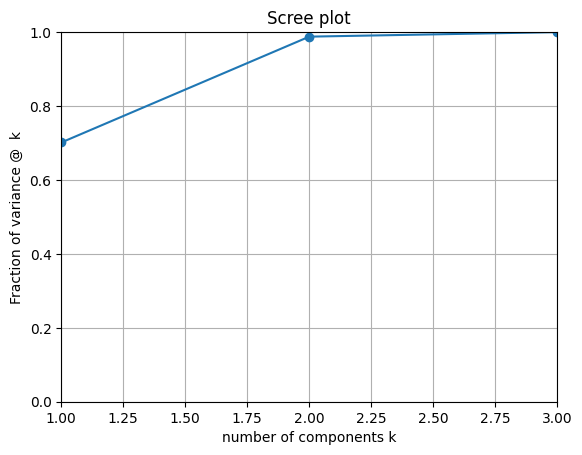

In [30]:

plt.plot(np.arange(len(cvar))+1, np.cumsum(cvar)/np.sum(cvar), 'o-')
plt.axis([1, len(ev), 0, 1])
plt.xlabel("number of components k")
plt.ylabel("Fraction of variance @  k")
plt.grid()
plt.title("Scree plot")
plt.show()

# Some other plots ig could be useful

In [31]:
pc1 = pc[:, 0]
pc2 = pc[:, 1]
print('Dot product of the first two principal components:', np.dot(pc1, pc2))
print('Norm of the first two principal components:', 
      np.linalg.norm(pc1), np.linalg.norm(pc1))

print("The principle component matrix multiple by its transpose:\n",
      np.dot(pc.T, pc))

Dot product of the first two principal components: -8.140317221868321e-18
Norm of the first two principal components: 0.9999999999999999 0.9999999999999999
The principle component matrix multiple by its transpose:
 [[ 1.00000000e+00 -8.14031722e-18 -2.48054361e-16]
 [-8.14031722e-18  1.00000000e+00  2.01602155e-16]
 [-2.48054361e-16  2.01602155e-16  1.00000000e+00]]


In [32]:
k = 1 # number of components to keep
W = pc[:, 0:k] 
Z = np.dot(Xn, W)
print("Data after transformation\n", Z)
print("Standard deviation after transformation", np.std(Z, axis=0))
print("Variance after transformation", np.var(Z, axis=0))
print("Fraction of variance captured along the projections",
      np.var(Z, axis=0)/np.sum(np.var(Xn, axis=0)))

Data after transformation
 [[ 1.99023224]
 [-0.83176671]
 [ 1.60043879]
 [ 2.35867224]
 [ 1.18159108]
 [ 0.3666679 ]
 [-1.30839274]
 [-0.95502416]
 [-0.33780563]
 [-0.37087829]
 [-1.43391382]
 [ 0.53740326]
 [-2.79722418]]
Standard deviation after transformation [1.45054903]
Variance after transformation [2.10409249]
Fraction of variance captured along the projections [0.70136416]


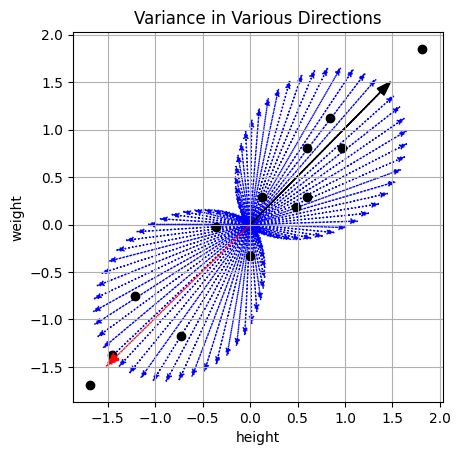

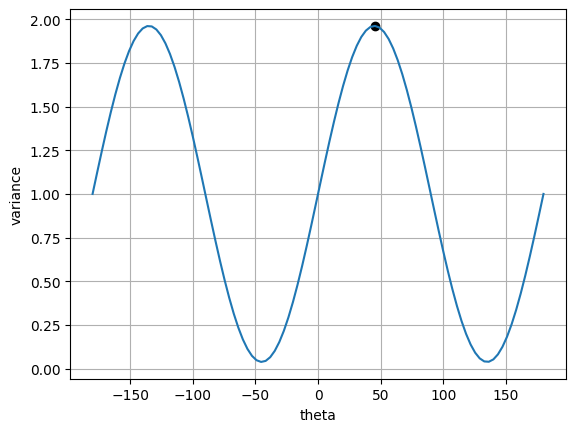

Maximum Variance 1.9614249812906879
Direction of Maximum Variance [0.7014748877063212, 0.7126941713788629]


In [33]:
import numpy as np
theta = (2 * np.linspace(0, 1, 100) - 1)* np.pi
vx = np.zeros(theta.shape[0])
maxv = 0
best_w = None
best_theta = 0
for i, t in enumerate(theta):
    wt = [np.cos(t), np.sin(t)]
    vx[i] = np.var(np.dot(wt, Xn[:, :2].T))
    plt.arrow(0, 0, vx[i]*wt[0], vx[i]*wt[1], color='b',
              head_width=0.05, linestyle=':')
    if vx[i] > maxv:
        maxv = vx[i]
        best_w = wt
        best_theta = t
plt.scatter(Xn[:, 0], Xn[:, 1], color='k')
plt.arrow(0, 0, maxv*best_w[0], maxv*best_w[1], color='k', head_width=0.1)
plt.arrow(0, 0, cvar[0]*pc[0, 0] ,cvar[0]*pc[1, 0], color='r',
          head_width=0.1, linestyle=':')

plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.axis('square')
plt.title("Variance in Various Directions")
plt.show()

plt.plot(theta*180/np.pi,vx)
plt.scatter(best_theta*180/np.pi, maxv, color='k')
plt.xlabel("theta")
plt.ylabel("variance")
plt.grid()
plt.show()
print("Maximum Variance", maxv)
print("Direction of Maximum Variance", best_w)

Inverse project

In [34]:
Z

array([[ 1.99023224],
       [-0.83176671],
       [ 1.60043879],
       [ 2.35867224],
       [ 1.18159108],
       [ 0.3666679 ],
       [-1.30839274],
       [-0.95502416],
       [-0.33780563],
       [-0.37087829],
       [-1.43391382],
       [ 0.53740326],
       [-2.79722418]])

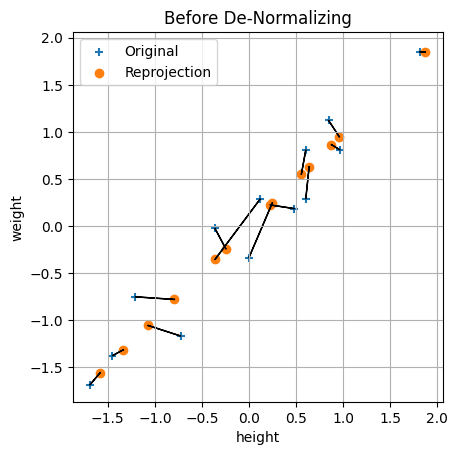

In [35]:
iW = W.T
Xr = np.dot(Z, iW)

plt.scatter(Xn[:, 0], Xn[:, 1], marker='+') # original

plt.scatter(Xr[:, 0], Xr[:, 1]) # reprojection

plt.legend(['Original', 'Reprojection'])
for x, xr in zip(Xn[:,:2], Xr):    
    plt.arrow(x[0], x[1], xr[0]-x[0], xr[1]-x[1])
    

plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.grid()
plt.title('Before De-Normalizing')
plt.show()

In [36]:
np.angle(pc[:,0], deg=True)

array([180., 180.,   0.])

Finding the angle between the principle component and the initial viewing angle.

In [37]:
v2 = pc[:,0]
v1 = np.array([1,0,0])
print(np.cross(pc[:,0], [0,1,0]), np.cross(pc[:,0], [0,0,1]))

[-0.33824407  0.         -0.66998245] [-0.66084375  0.66998245  0.        ]


In [53]:
def asCartesian(rthetaphi):
    #takes list rthetaphi (single coord)
    r       = rthetaphi[0]
    theta   = rthetaphi[1]* np.pi/180 # to radian
    phi     = rthetaphi[2]* np.pi/180
    x = r * np.sin( theta ) * np.cos( phi )
    y = r * np.sin( theta ) * np.sin( phi )
    z = r * np.cos( theta )
    return [x,y,z]

def asSpherical(xyz):
    #takes list xyz (single coord)
    x       = xyz[0]
    y       = xyz[1]
    z       = xyz[2]
    r       =  np.sqrt(x*x + y*y + z*z)
    theta   =  np.arccos(z/r)/180* np.pi
    phi     =  np.arctan2(y,x)/180* np.pi
    return [r,theta,phi]

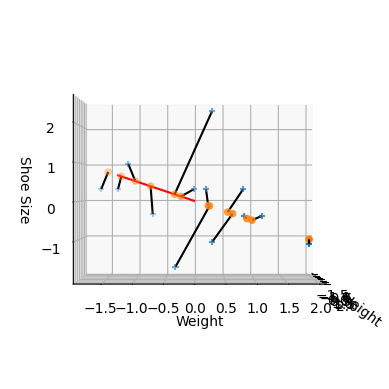

In [101]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Xn[:,0], Xn[:,1], Xn[:,2], marker='+')
ax.scatter(Xr[:,0], Xr[:,1], Xr[:,2])
for x, xr in zip(Xn, Xr):    
    ax.quiver(x[0], x[1], x[2], xr[0]-x[0], xr[1]-x[1], xr[2]-x[2], color="black", arrow_length_ratio=0)

ax.quiver(0, 0, 0, # starting point of vector
    pc[0, 0]*ev[0], pc[1, 0]*ev[0], pc[2, 0]*ev[0], # direction of vector
    color = 'red', arrow_length_ratio=0)

ax.view_init(elev=asSpherical(pc[:,1])[2], azim=asSpherical(pc[:,1])[1], roll=0) 
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Shoe Size')
ax.grid()
plt.show()

In [68]:

print("Average Reconstruction Error over normalized data",
      np.mean(np.linalg.norm(np.dot(Z,iW)-Xn,axis=1)**2))
print("Difference between total variance and variance along projection",
      np.sum(np.var(Xn, axis=0))-np.sum(np.var(Z, axis=0)))


Average Reconstruction Error over normalized data 0.895907508540514
Difference between total variance and variance along projection 0.8959075085405144
